<a href="https://colab.research.google.com/github/Samuel-Egbert31415/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_Unit1_Sprint2_Samuel_Egbert_AG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Autograded Notebook (Canvas & CodeGrade)

This notebook will be automatically graded. It is designed to test your answers and award points for the correct answers. Following the instructions for each Task carefully.

### Instructions

* **Download this notebook** as you would any other ipynb file
* **Upload** to Google Colab or work locally (if you have that set-up)
* **Delete `raise NotImplementedError()`**
* Write your code in the `# YOUR CODE HERE` space
* **Execute** the Test cells that contain `assert` statements - these help you check your work (others contain hidden tests that will be checked when you submit through Canvas)
* **Save** your notebook when you are finished
* **Download** as a `ipynb` file (if working in Colab)
* **Upload** your complete notebook to Canvas (there will be additional instructions in Slack and/or Canvas)

# Lambda School Data Science - Unit 1 Sprint 2

---

## Sprint Challenge: Statistical Tests and Experiments

## Part A: Statistical Analysis

### Use the following information to complete tasks 1 - 8

### Dataset description: 

Anyone who is a fan of detective TV shows has watched a scene where human remains are discovered and some sort of expert is called in to determine when the person died. But is this science fiction or science fact? Is it possible to use evidence from skeletal remains to determine how long a body has been buried (a decent approximation of how long the person has been dead)? 

Researchers sampled long bone material from bodies exhumed from coffin burials in two cemeteries in England. In each case, date of death and burial (and therefore interment time) was known. This data is given in the `Longbones.csv` dataset which you can find [here](https://github.com/LambdaSchool/data-science-practice-datasets/blob/main/unit_1/Longbones/Longbones.csv).

**What can we learn about the bodies that were buried in the cemetery?**

The variable names are:
* Site = Site ID, either Site 1 or Site 2
* Time = Interrment time in years
* Depth = Burial depth in ft.
* Lime = Burial with Quiklime (0 = No, 1 = Yes)
* Age = Age at time of death in years
* Nitro = Nitrogen composition of the long bones in g per 100g of bone.
* Oil = Oil contamination of the grave site (0 = No contamination, 1 = Oil contamination)

*Source: D.R. Jarvis (1997). "Nitrogen Levels in Long Bones from Coffin Burials Interred for Periods of 26-90 Years," Forensic Science International, Vol85, pp199-208*

**Task 1** - Load the data

As we usually begin, let's load the data! The URL has been provided.

* load your CSV file into a DataFrame named `df`

In [1]:
# Task 1

import pandas as pd
import numpy as np

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

df = pd.read_csv(data_url)

# Print out your DataFrame
df.head()

,Site,Time,Depth,Lime,Age,Nitro,Oil
0,1,88.5,7.0,1,NaN,3.88,1
1,1,88.5,NaN,1,NaN,4.00,1
2,1,85.2,7.0,1,NaN,3.69,1
3,1,71.8,7.6,1,65.0,3.88,0
4,1,70.6,7.5,1,42.0,3.53,0


**Task 1 - Test**

In [2]:
# Task 1 - Test

assert isinstance(df, pd.DataFrame), 'Have you created a DataFrame named `df`?'
assert len(df) == 42


**Task 2** - Missing data

Now, let's determine if there is any missing data in the dataset. If there is, drop the row that contains a missing value.

* check for missing/null values and assign the sum to `num_null` - the result should be the sum of all the null values and a single integer (*Hint: you will compute the sum of a sum*)
* if there are null values, drop them in place (your DataFrame should still be `df`)

*Hint: If you need to go back and update your DataFrame, read in the data again before calculating the null values*

In [16]:
# Task 2

data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Longbones/Longbones.csv'

df = pd.read_csv(data_url)

# Hint: Make sure to read in the data again if you re-do you Null calculation
print(df.shape)
print(df.isnull().sum())
num_null = df.isnull().sum().sum()

print('number of nulls = ',num_null)

df = df.dropna(axis = 0)
print(df.shape)
print(df.isnull().sum())

(42, 7)
Site     0
Time     0
Depth    1
Lime     0
Age      7
Nitro    0
Oil      0
dtype: int64
number of nulls =  8
(35, 7)
Site     0
Time     0
Depth    0
Lime     0
Age      0
Nitro    0
Oil      0
dtype: int64


**Task 2 - Test**

In [17]:
# Task 2 - Test
# Hidden tests - you will see the results when you submit to Canvas

### Use the following information to complete tasks 3 - 8

The mean nitrogen composition in living individuals is **4.3g per 100g of bone**.  

We wish to use the Longbones sample to test the null hypothesis that the mean nitrogen composition per 100g of bone in the deceased is 4.3g (equal to that of living humans) vs the alternative hypothesis that the mean nitrogen composition per 100g of bone in the deceased is not 4.3g (not equal to that of living humans).

**Task 3 -** Statistical hypotheses

Write the null and alternative hypotheses described above.

This task will not be autograded - but it is part of completing the challenge.

**Task 3 ANSWER:**

H_0 = the bones of the deceased is the same as the living, 4.3g/100g
H_a = the bones of the deceases is different from the living 4.3g/100g

**Task 4** - Statistical distributions

What is the appropriate test for these hypotheses?  A t-test or a chi-square test?  Explain your answer in a sentence or two.

This task will not be autograded - but it is part of completing the challenge.

**Task 4 ANSWER:**

1sample t-test: this test is used to determine if (at a given significance level) a given population has a mean value the same or different to a reference value

**Task 5** - Hypothesis testing

Use a built-in Python function to conduct the statistical test you identified earlier. The scipy stats module has been imported.

* Assign the t statistic to the variable `t` 
* Assign the p-value to the variable `p`

*Hint: Review the documentation to verify what it returns. You can assign the two variables in one step or two steps.*

In [23]:
# Task 5

# Use this import for your calculation
from scipy import stats as st # imported as st

t, p = st.stats.ttest_1samp(df['Age'], 4.3)
print(t)
print(p)




17.911394578457696
6.896930733163052e-19


**Task 5 Test**

In [21]:
# Task 5 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 6** - Conclusion

What is the p-value for this hypothesis test.  Do you reject or fail to reject the null hypothesis at the 0.05 level?


This task will not be autograded - but it is part of the project!

**Task 6 ANSWER:**

the p-value was .6*10^-19, so very small and much smaller than and alpha = 0.05, so we must reject the null and conclude that the bones of the deceased do not have a mean value of 4.3g/100g of bone

**Task 7** - Confidence Interval

Calculate a 95% confidence interval for the mean nitrogen composition in the longbones of a deceased individual using the t.interval function.

* Assign the lower end of the confidence interval to the variable `l` 
* Assign the upper end of the confidence interval to the variable `u`

*Hint: You will need to calculate other statistics to complete the confidence interval calculation. These variables can be named whatever you like - just make sure to name your confidence interval variables as specified above.*

In [27]:
# Task 7

# Use this import for your calculation
from scipy.stats import t
degfree = len(df['Nitro']) - 1
deceasedNitro_mean = df['Nitro'].mean()
seNitro = (df['Nitro'].std())/((degfree + 1)**(1/2))
l, u = t.interval(alpha = 0.95, df = degfree - 1, loc = deceasedNitro_mean, scale = seNitro) # Variable unpacking
print('Lower Bound = ', l)
print('Upper Bound = ', u)

Lower Bound =  3.7339516979140583
Upper Bound =  3.858048302085942


**Task 7 Test**

In [29]:
# Task 7 - Test
# Hidden tests - you will see the results when you submit to Canvas

**Task 8** - Conclusion

Write an interpretation of your 95% confidence interval.

This task will not be autograded - but it is part of completing the challenge.

**Task 8 ANSWER:**

with 95% confidence, the population mean of g(nitrogen)/100g bone of the deceased is above 3.73g/100g and below 3.85g/100g

## Part B: A/B Testing

### Use the following information to complete tasks 9 - 18

### A/B Testing and Udacity

Udacity is an online learning platform geared toward tech professionals who want to develop skills in programming, data science, etc.  These classes are intensive - both for the students and instructors - and the learning experience is best when students are able to dedicate enough time to the classes and there is not a lot of student churn.

Udacity wished to determine if presenting potential students with a screen that would remind them of the time commitment involved in taking a class would decrease the enrollment of students who were unlikely to succeed in the class.

At the time of the experiment, when a student selected a course, she was taken to the course overview page and presented with two options: "start free trial", and "access course materials".

If the student clicked "start free trial", she was asked to enter her credit card information and was enrolled in a free trial for the paid version of the course (which would covert to a paid membership after 14 days).

If the student clicked "access course materials", she could view the videos and take the quizzes for free but could not access all the features of the course such as coaching.

*Credit*: [Udacity A/B testing final project example](https://https://www.udacity.com/course/ab-testing--ud257?irclickid=W0WQs22htxyLTIxwUx0Mo3YgUkEzM2Rn81NW2g0&irgwc=1&utm_source=affiliate&utm_medium=&aff=27795&utm_campaign=_khm68yp1xv02l1pj0mzy8__)

**Here's the experiment:** Udacity tested a change where if the student clicked "start free trial", she was asked how much time she had available to devote to the course. 

If the student indicated 5 or more hours per week, she would be taken through the checkout process as usual. If she indicated fewer than 5 hours per week, a message would appear indicating that Udacity courses usually require a greater time commitment for successful completion and suggesting that the student might like to access the course materials for free. 

At this point, the student would have the option to continue enrolling in the free trial, or access the course materials for free instead. 

**Now we wish to see if there was an association between the screen the potential student viewed and whether or not the student enrolled in the paid version of the course.**

The Udacity data is linked below and is in a non-tidy format.  We'll be focusing on the number of enrolling customers who convert to paying customers. 

You don't need to do anything with the **non-tidy** data in this Challenge; we're sharing it here so you can get an idea of what data looks like *before* we clean it.

In [30]:
# Run this cell to load the "non-tidy" data
import pandas as pd
import numpy as np

# Load data
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB%20testing%20data.csv'
ABtest_ = pd.read_csv(data_url)

print(ABtest_.shape)
ABtest_.head()

(999, 10)


,Date,C-Pageviews,C-Clicks,C-Enrollments,C-Payments,E-Pageviews,E-Clicks,E-Enrollments,E-Payments,Unnamed: 9
0,"Sat, Oct 11",7723.0,687.0,134.0,70.0,7716.0,686.0,105.0,34.0,NaN
1,"Sun, Oct 12",9102.0,779.0,147.0,70.0,9288.0,785.0,116.0,91.0,NaN
2,"Mon, Oct 13",10511.0,909.0,167.0,95.0,10480.0,884.0,145.0,79.0,NaN
3,"Tue, Oct 14",9871.0,836.0,156.0,105.0,9867.0,827.0,138.0,92.0,NaN
4,"Wed, Oct 15",10014.0,837.0,163.0,64.0,9793.0,832.0,140.0,94.0,NaN


Now, here is the enrollment and payment data in tidy format.  You can see how I set it up [here](https://colab.research.google.com/drive/1eSOjXoj9MpO04h24wnHXRWGE2jhuhw65?usp=sharing).

In [32]:
# Run this cell to load the "tidy" data
data_url = 'https://raw.githubusercontent.com/LambdaSchool/data-science-practice-datasets/main/unit_1/Udacity%20AB%20testing%20data/AB_test_payments.csv'

ABtest = pd.read_csv(data_url, skipinitialspace=True, header=0)

print(ABtest.shape)
ABtest

(7208, 3)


,UserID,Group,Payment
0,0,Control,1
1,1,Control,1
2,2,Control,1
3,3,Control,1
4,4,Control,1
...,...,...,...
7203,3418,Experiment,0
7204,3419,Experiment,0
7205,3420,Experiment,0
7206,3421,Experiment,0


### Dataset information

The "tidy" data has the following values for the columns:

* Group = Control or Experimental depending on the screen viewed
* Payment = 0 if the individual did not not enroll as a paying customer, 1 = if the individual did enroll as a paying customer

**Our goal is to determine if there is an association between the screen that a potential student viewed as she was signing up for a course and whether or not she converted to a paying customer.**

**Task 9** - Statistical hypotheses

Write the null and alternative hypothesis to test if there is an association between the screen that a potential student viewed as she was signing up for a course and whether or not he or she converted to a paying customer.

This task will not be autograded - but it is part of completing the challenge.

**Task 9 ANSWER:**

H_0: There is no relationship between what screen was viewed (control/experiment (told they must commit at least 5 hours)) and whether the potential student enrolled as a paying, or non-paying student

**Task 10** - Frequency and relative frequency

Calculate the frequency and relative frequency of viewing the control version of the website and the experimental version of the website.

* Use `pd.crosstab()`
* Assign the frequency table the name `group_freq`
* Assign the relative frequency table the name `group_pct`.  Multiply by 100 to convert the proportions in the table to percents.

In [53]:
# Task 10

group_freq = pd.crosstab(index = ABtest['Group'], columns = ABtest['Group'])
print(group_freq)

group_pct = pd.crosstab(index = ABtest['Group'], columns = ABtest['Group'], normalize = 'columns', margins = True)*100
print(group_pct)

Group       Control  Experiment
Group                          
Control        3785           0
Experiment        0        3423
Group       Control  Experiment        All
Group                                     
Control       100.0         0.0  52.511099
Experiment      0.0       100.0  47.488901


**Task 10 Test**

In [54]:
# Task 10 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 11** - Frequency and relative frequency

Calculate the frequency and relative frequency of converting to a paying customer.

* Use `pd.crosstab()`
* Assign the frequency table the name `pay_freq`
* Assign the relative frequency table the name `pay_pct`.  Multiply by 100 to convert the proportions in the table to percents.

In [55]:
# Task 11

pay_freq = pd.crosstab(index = ABtest['Payment'], columns = ABtest['Payment'])
print(pay_freq)

pay_pct = pd.crosstab(index = ABtest['Payment'], columns = ABtest['Payment'], normalize = 'index', margins = True )*100
print(pay_pct)


Payment     0     1
Payment            
0        3230     0
1           0  3978
Payment           0           1
Payment                        
0        100.000000    0.000000
1          0.000000  100.000000
All       44.811321   55.188679


**Task 11 Test**

In [56]:
# Task 11 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 12** - Joint distribution

Calculate the joint distribution of experimental condition and conversion to a paying customer.

* Use the experimental group as the index variable
* Name the results of the joint distribution `joint_dist`

In [52]:
# Task 12

joint_dist = pd.crosstab(index = ABtest['Group'], columns = ABtest['Payment'])

joint_dist

Payment,0,1
Group,,
Control,1752,2033
Experiment,1478,1945


**Task 12 Test**

In [ ]:
# Task 12 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 13** - Marginal distribution

Add the table margins to the joint distribution of experimental condition and conversion to a paying customer.

* Use the experimental group as the index variable
* Name the results of the distribution `marginal_dist`

In [58]:
# Task 13

marginal_dist = pd.crosstab(index = ABtest['Group'], columns = ABtest['Payment'], margins = True)
marginal_dist

Payment,0,1,All
Group,,,
Control,1752,2033,3785
Experiment,1478,1945,3423
All,3230,3978,7208


**Task 13 Test**

In [59]:
# Task 13 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 14 -** Conditional distribution

Calculate the distribution of payment conversion conditional on the text the individual saw when he or she was signing up for Udacity.
* Use the experimental group as the index variable
* Name the results of the distribution `conditional_dist`

In [61]:
# Task 14

conditional_dist = pd.crosstab(index = ABtest['Group'], columns = ABtest['Payment'], normalize = 'index')
conditional_dist

Payment,0,1
Group,,
Control,0.462880,0.537120
Experiment,0.431785,0.568215


**Task 14 Test**

In [62]:
# Task 14 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 15** - Statistical distributions

Identify the appropriate statistical test to determine if there is an association between the screen that a potential student viewed as she was signing up for a course and whether or not he or she converted to a paying customer.

This task will not be autograded - but it is part of completing the challenge.

**Task 15 ANSWER:**

Chi-Squared Test: we want to test to see if two variables a related in a non-random way.  The best way to do this is Chi-Squared

**Task 16** - Hypothesis testing

Conduct the hypothesis test you identified in Task 15.
* Assign the p-value to the variable `p`

*Hint: The `chi2_contingency()` function returns more than one parameter - make sure to read the documentation to assign the correct one to your p-value*

In [69]:
# Task 16

from scipy.stats import chi2_contingency

g, p, dof, expctd = chi2_contingency(pd.crosstab(index = ABtest['Group'], columns = ABtest['Payment']))
print(p)

0.008608736615463934


**Task 16 Test**

In [70]:
# Task 16 - Test
# Hidden tests - you will see the results when you submit to Canvas


**Task 17** - Conclusions

Do you reject or fail to reject the null hypothesis at the 0.05 significance level?

This task will not be autograded - but it is part of completing the challenge.

**Task 17 ANSWER:**

at the 0.05 significance level, I must reject the null hypothesis that showing students that they must commit 5 hours makes no difference to whether they use the 'pay' option or 'no-pay'

**Task 18** - Visualization

Draw a side-by-side boxplot illustrating the conditional distribution of conversion by experimental group.

This task will not be autograded - but it is part of completing the challenge.

TypeError: ignored

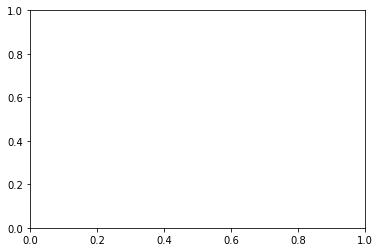

In [73]:
# Create your plot here
import matplotlib.pyplot as plt

plt.boxplot([ABtest['Group'], ABtest['Payment']], labels=['Group','Payment'], vert=False)

plt.xlabel('Group')
plt.ylabel('Payment')
plt.title('Payment by Experimental Group')
plt.show()




**Task 19** - Bayesian and Frequentist Statistics

In a few sentences, describe the difference between Bayesian and Frequentist statistics.

This task will not be autograded - but it is part of completing the challenge.

**Task 19 ANSWER:**

Bayesian gives probabilities given certain knowns, it is subsetted.  Frequentist calculates probabilities relative to all of the data, not just a subset, or what is known